## Statistique inférentielle - Théorie de l'estimation - Exercice 12.4

(Dé)Montrez numériquement que la variance 'normale' $$𝑠^2$$ définie comme la moyenne des carrés des écarts avec la moyenne de l'échantillon est bien un estimateur biaisé de la variance $$𝜎^2$$  de la population alors que la variance modifiée $$𝑠 ̂^2=𝑛/(𝑛−1) 𝑠^2$$ ne l’est pas.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys

Plusieurs chemins sont possibles... je reprendrai ici un chemin suivi au cours.
Nous partirons d'une population créée a priori, contenant 100000 exemples, distribués suivant une gaussienne de centre 0 et d'écart-type 1.

In [43]:
population_size = 5000
sigma = 1
center = 0

population_df = pd.DataFrame()
population_df['value'] = np.random.normal(size=population_size, loc=center, scale=sigma)

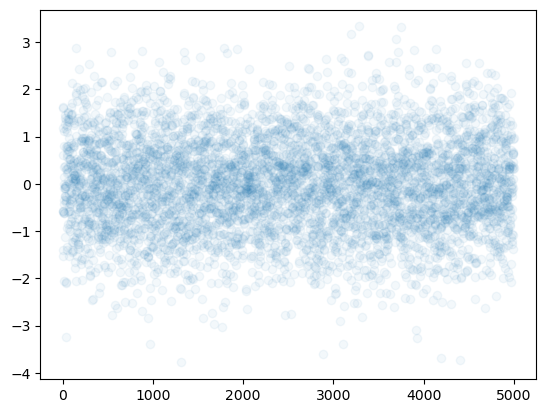

In [45]:
plt.plot(population_df['value'], 'o', alpha=0.05)
plt.show()

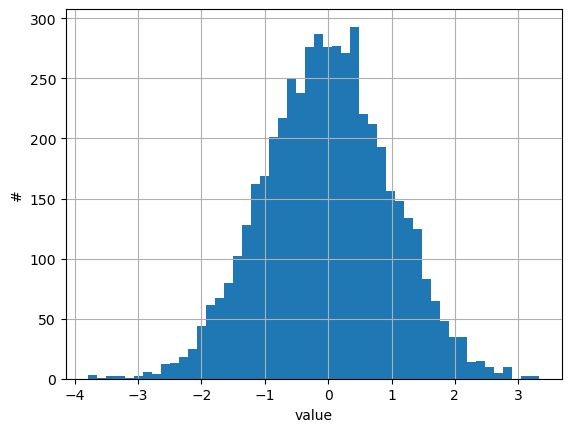

In [49]:
population_df['value'].hist(bins=50)
plt.xlabel('value')
plt.ylabel('#')
plt.show()

<p>Au sein de cette population fixée, nous allons tiré 500 échantillons de taille 5 sans remplacement et, pour chaque échantillon, calculer la variance
'normale' et placer le résultat dans un DataFrame var_df.</p>
<p>Pour ce faire, nous utiliserons la fonction var() du package numpy</p>

In [65]:
n_samples = 500
sample_size = 5

var_df = pd.DataFrame()

random.seed(4242)
max_seed = 2**32-1

i_sample_list = range(0, n_samples)
var_list = []

for i_sample in i_sample_list:
    sample_df = population_df.sample(sample_size, random_state=random.randint(0,max_seed))
    var_list.append(np.var(sample_df['value']))

In [67]:
var_df = pd.DataFrame()
var_df['i_sample'] = i_sample_list
var_df['var'] = var_list

var_df

,i_sample,var
0,0,0.171120
1,1,0.410731
2,2,0.779068
3,3,1.237229
4,4,0.449350
...,...,...
495,495,0.227998
496,496,0.890785
497,497,0.251008
498,498,1.248050


Dessinons un histogramme de ces valeurs de variances, en indiquant la moyenne par une barre verticale.

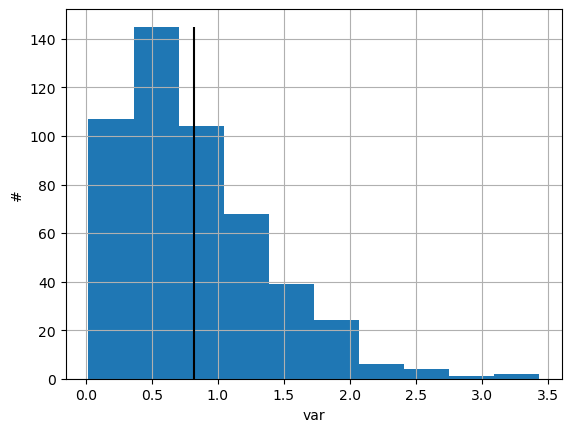

In [70]:
var_df['var'].hist()

mean_var = var_df['var'].mean()
plt.vlines(mean_var, ymin=0, ymax=np.histogram(var_df['var'])[0].max(), color='black')
plt.xlabel('var')
plt.ylabel('#')
plt.show()

In [14]:
mean_var

0.8191636177895119

On est donc assez loin de la variance de la population, sigma=1 !!!

On a donc bien un estimateur biaisé!!!

Corrigeons donc avec le facteur n/(n-1) :

In [72]:
var_df['var corr'] = var_df['var']*sample_size/(sample_size-1)

In [74]:
var_df.head()

,i_sample,var,var corr
0,0,0.171120,0.213900
1,1,0.410731,0.513414
2,2,0.779068,0.973835
3,3,1.237229,1.546536
4,4,0.449350,0.561687


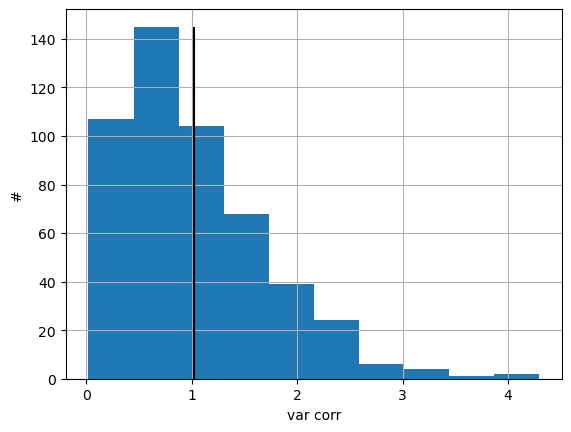

In [76]:
var_df['var corr'].hist()
plt.vlines(var_df['var corr'].mean(),ymin=0,ymax=np.histogram(var_df['var corr'])[0].max(),color='black')
plt.xlabel('var corr')
plt.ylabel('#')
plt.show()

Ici, avec cette correction par le facteur n/(n-1) on obtient bien une distribution dont la moyenne n'est autre que la variance de la population, soit 1!

In [80]:
var_df

,i_sample,var,var corr
0,0,0.171120,0.213900
1,1,0.410731,0.513414
2,2,0.779068,0.973835
3,3,1.237229,1.546536
4,4,0.449350,0.561687
...,...,...,...
495,495,0.227998,0.284997
496,496,0.890785,1.113482
497,497,0.251008,0.313760
498,498,1.248050,1.560062


Qu'en est-il alors de la racine carré de l'estimateur corrigé de la variance ?
On pourrait croire qu'il donnerait un estimateur non-biaisé de l'écart-type.
Vérifions ce qu'il en est.

In [83]:
import math

var_df['sqrt var corr'] = var_df.apply(lambda r:math.sqrt(r['var corr']), axis=1)

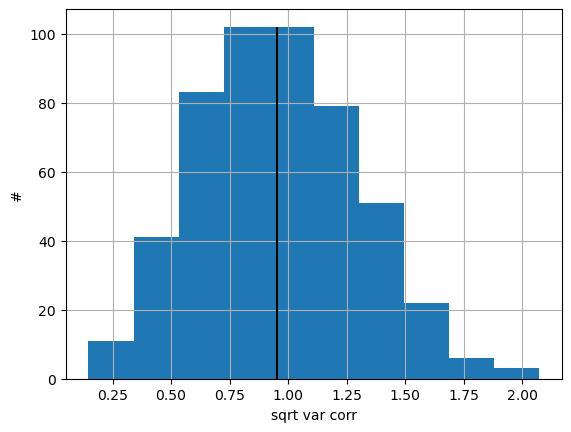

In [85]:
var_df['sqrt var corr'].hist()
plt.vlines(var_df['sqrt var corr'].mean(), ymin=0, ymax=np.histogram(var_df['sqrt var corr'])[0].max(), color='black')
plt.xlabel('sqrt var corr')
plt.ylabel('#')
plt.show()

On voit clairement que la moyenne de cet estimateur ne correspond PAS au sigma de la population qui vaut 1!!!  
Donc, on a encore et toujours un estimateur biaisé!!!